# Evaluating Classification Models
Estimated time needed: 25 minutes

Objectives
After completing this lab, you will be able to:

Implement and evaluate the performance of classification models on real-world data
Interpret and compare various evaluation metrics and the confusion matrix for each model

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Breast Cancer data set¶


In [5]:
data = load_breast_cancer()
X, y = data.data, data.target
labels = data.target_names
feature_names = data.feature_names

print("Shape of X", X.shape)
print("Shape of y", y.shape)

Shape of X (569, 30)
Shape of y (569,)


In [ ]:
print(data.DESCR)

In [7]:
print(data.target_names)

['malignant' 'benign']


In [8]:
scaler = StandardScaler()

In [9]:
X_scaled = scaler.fit_transform(X)

## add some noise

In [10]:
np.random.seed(42)
noise_factor = 0.5
X_noisy = X_scaled + noise_factor * np.random.normal(loc=0, scale=1, size=X_scaled.shape)

## load the original and noisy data sets into a Dataframe for comparison and visualization


In [11]:
df = pd.DataFrame(X_scaled, columns=feature_names)
df_noisy = pd.DataFrame(X_noisy, columns=feature_names)

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [13]:
df_noisy.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.345421,-2.142467,1.593778,1.745890,1.451390,3.166446,3.442480,2.916193,1.982778,2.527027,...,2.619514,-1.472182,2.337365,1.288863,1.035495,2.672126,1.534030,2.483925,2.450303,1.791168
1,1.528967,0.572507,1.679206,1.379853,-0.415690,-1.097493,0.080586,-0.431691,-0.662701,-0.770222,...,1.967969,-0.561744,1.196665,2.196327,0.139888,0.035196,-0.566358,0.932478,-0.078258,0.768963
2,1.340301,0.363357,1.013336,0.960780,1.348473,1.731046,1.327473,2.538997,1.120503,-0.720568,...,1.402034,0.154582,2.086422,1.197149,0.123161,0.832054,1.312675,2.119376,0.887375,0.458025
3,-0.720371,0.738055,-0.943714,-0.928295,3.087499,2.671152,2.063957,1.582235,2.869940,4.793626,...,-1.240850,0.120727,-0.219824,0.681600,3.298094,4.044171,1.972232,1.591447,6.617453,5.310977
4,2.145813,-1.606510,2.477970,1.125304,0.573800,1.634568,0.875743,1.145344,0.040265,-0.814188,...,1.412305,-0.813199,0.534798,1.313041,0.350498,0.077517,-0.005297,0.069031,-0.607382,-0.248607


## Histograms

Text(0, 0.5, 'Frequency')

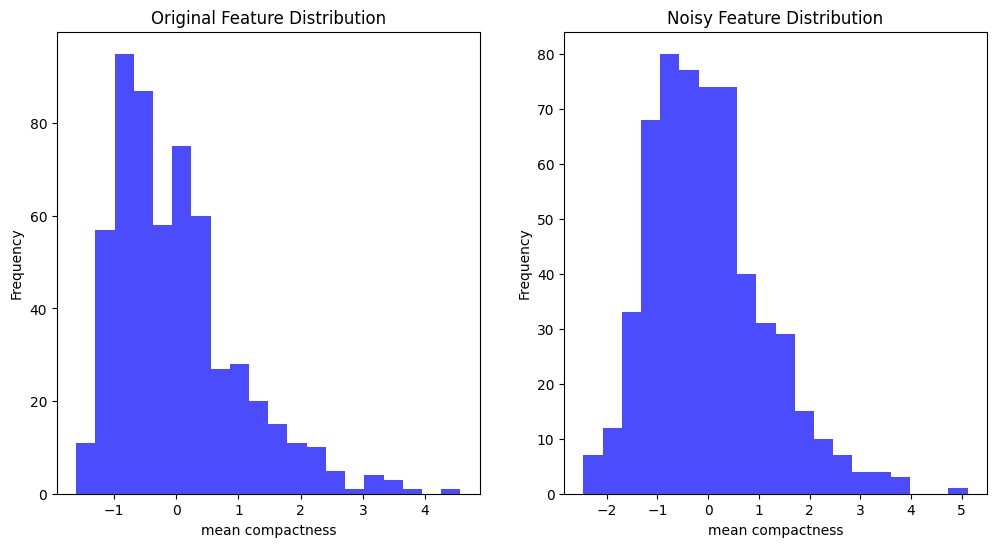

In [14]:
plt.figure(figsize=(12,6))

## Original Feature Distribution
plt.subplot(1,2,1)
plt.hist(df.iloc[:,5], bins=20, alpha=0.7, color='blue', label='Original')
plt.title('Original Feature Distribution')
plt.xlabel(feature_names[5])
plt.ylabel('Frequency')

## Noisy Feature Distribution
plt.subplot(1,2,2)
plt.hist(df_noisy.iloc[:,5], bins=20, alpha=0.7, color='blue', label='Original')
plt.title('Noisy Feature Distribution')
plt.xlabel(feature_names[5])
plt.ylabel('Frequency')



## scatter plot

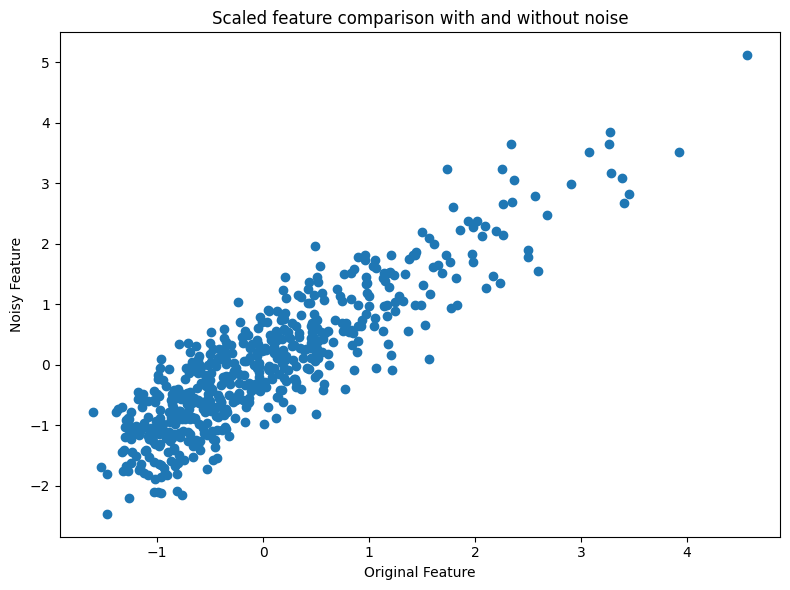

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:,5], df_noisy.iloc[:,5])
plt.title('Scaled feature comparison with and without noise')
plt.xlabel('Original Feature')
plt.ylabel('Noisy Feature')
plt.tight_layout()
plt.show()

## Exercise 1. Split the data, and fit the KNN and SVM models to the noisy training data¶

In [43]:
xTrain, xTest, yTrain, yTest = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
xTrain_n, xTest_n, yTrain, yTest = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC(kernel='linear', C=1, random_state=42)

knn.fit(xTrain, yTrain)
svc.fit(xTrain, yTrain)

yPred_knn = knn.predict(xTrain)
yPred_svc = svc.predict(xTrain)

print(f"Training")
print(f"Accuracy of KNN: {accuracy_score(yTrain, yPred_knn):.2f}")
print(f"Accuracy of SVC: {accuracy_score(yTrain, yPred_svc):.2f}")
print("KNN classification report")
print(classification_report(yTrain, yPred_knn))
print("SVC classification report")
print(classification_report(yTrain, yPred_svc))



yPred_knn = knn.predict(xTest)
yPred_svc = svc.predict(xTest)
print(f"Test")
print(f"Accuracy of KNN: {accuracy_score(yTest, yPred_knn):.2f}")
print(f"Accuracy of SVC: {accuracy_score(yTest, yPred_svc):.2f}")
print("KNN classification report")
print(classification_report(yTest, yPred_knn))
print("SVC classification report")
print(classification_report(yTest, yPred_svc))

Training
Accuracy of KNN: 0.98
Accuracy of SVC: 0.99
KNN classification report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       169
           1       0.97      1.00      0.98       286

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455

SVC classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       169
           1       0.99      0.99      0.99       286

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455

Test
Accuracy of KNN: 0.95
Accuracy of SVC: 0.96
KNN classification report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

  

In [40]:
knn.fit(xTrain_n, yTrain)
svc.fit(xTrain_n, yTrain)

yPred_knn = knn.predict(xTest_n)
yPred_svc = svc.predict(xTest_n)

print(f"Accuracy of KNN (noisy): {accuracy_score(yTest, yPred_knn):.2f}" )
print(f"Accuracy of SVC (noisy): {accuracy_score(yTest, yPred_svc):.2f}" )
print("KNN classification report (noisy)")
print(classification_report(yTest, yPred_knn))
print("SVC classification report (noisy)")
print(classification_report(yTest, yPred_svc))

Accuracy of KNN (noisy): 0.93
Accuracy of SVC (noisy): 0.96
KNN classification report (noisy)
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

SVC classification report (noisy)
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## Plot the confusion matrix

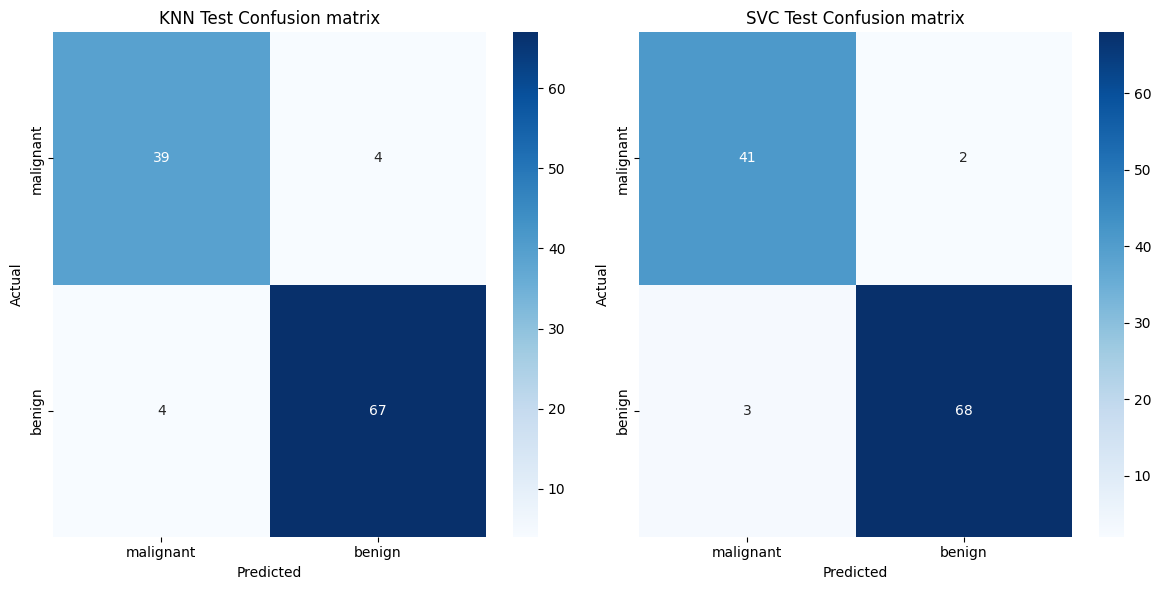

In [42]:
cm_knn = confusion_matrix(yTest, yPred_knn)
cm_svc = confusion_matrix(yTest, yPred_svc)

fig, axes = plt.subplots(1,2,figsize=(12,6))

sns.heatmap(cm_knn,annot=True, cmap='Blues',ax=axes[0], xticklabels=labels, yticklabels=labels)
axes[0].set_title('KNN Test Confusion matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_svc, annot=True,cmap='Blues', ax=axes[1], xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVC Test Confusion matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()